# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [48]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [49]:
stu_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
print(stu_data.shape)
stu_data.head()

(10, 2)


,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4


Draw a dispersion diagram (scatter plot) for the data.

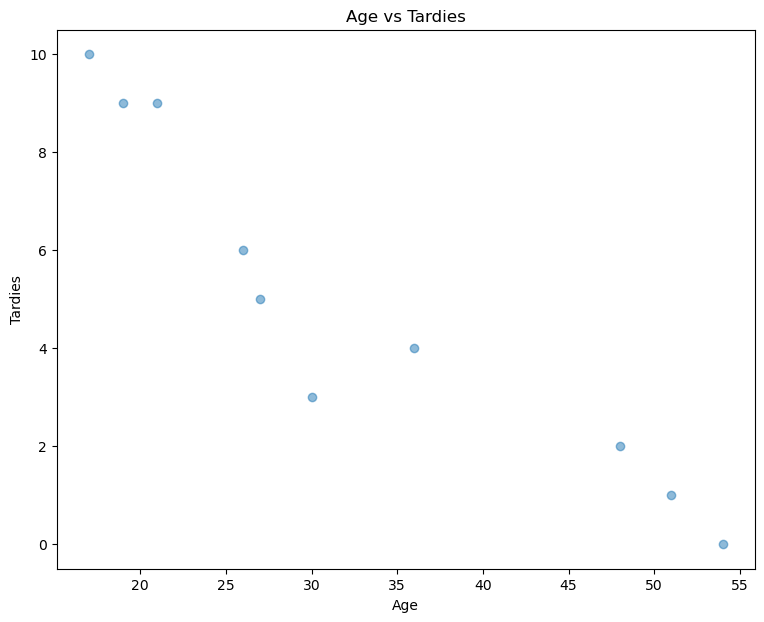

In [50]:
plt.figure(figsize=(9, 7))
plt.scatter(stu_data['Age'], stu_data['Tardies'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Age vs Tardies')
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

*Yes, it looks like linear regration with negative slope*

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [51]:
covar = stu_data['Age'].cov(stu_data['Tardies'])
corr = stu_data['Age'].corr(stu_data['Tardies'])
print(f'''The covariance is {covar:.3f}. How it is negative we can say that one increases while the other decreases and how it is far from 0, 
      there is a linear relationship.\nThe correlation is {corr:.3f}. The difference with the covariance is that the correlation goes from -1
      to 1 and how is closer to -1, it has a stronger negative relationship.''')
      

The covariance is -45.567. How it is negative we can say that one increases while the other decreases and how it is far from 0, 
      there is a linear relationship.
The correlation is -0.939. The difference with the covariance is that the correlation goes from -1
      to 1 and how is closer to -1, it has a stronger negative relationship.


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [52]:
# Reshape
X = stu_data.Age.values.reshape(-1, 1)
y = stu_data.Tardies.values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8, 1) (2, 1) (8,) (2,)


In [53]:
# We apply the model, in this case linear

# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Print coeficient and intercept of the regression
print(lm.intercept_, lm.coef_)

12.52061147372037 [-0.23462728]


Plot your regression model on your scatter plot.

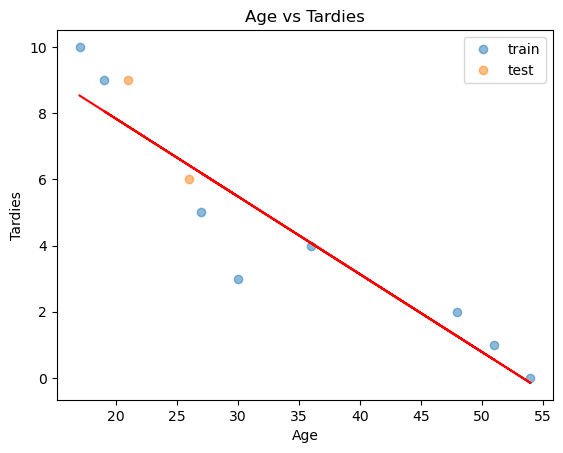

In [54]:
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_train_pred = lm.predict(X_train)

plt.plot(X_train, y_train, "o", alpha=.5, label='train')
plt.plot(X_test, y_test, "o", alpha=.5, label='test')
plt.plot(X_train, y_train_pred, "r")
plt.legend()
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Age vs Tardies')
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [55]:
print('Score:')
print(lm.score(X_train, y_train), lm.score(X_test, y_test))

# Compute MSE for training and testing sets 
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

mse_train = np.mean((y_train_pred - y_train)**2)
mse_test = np.mean((y_test_pred - y_test)**2)
print('MSE:')
print(mse_train, mse_test)

Score:
0.8756854065885382 0.5210958290605832
MSE:
1.4218481621435934 1.077534384613688


*The slope is negative so indicates that when the age is higher the tardines decreases.
But Age alone can not predict tardiness
The points are scattered and not on the line
We don't have enough data to make accurate predictions.
We can not trust the age predictor (lm.score for test data very far from 1, mse_test very big)*

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [56]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [57]:
print(vehicles.shape)
vehicles.head()

(35952, 15)


,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [58]:
# Selecting the data
X_vehi = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y_vehi = vehicles['CO2 Emission Grams/Mile']

# Loop that creates a list with all the correlation of each variable
corr = []
for feat_name in X_vehi.columns:
    corr.append(X_vehi[feat_name].corr(y_vehi))

corr_df = pd.DataFrame({'Features': X_vehi.columns, 'Correlation': corr})
print(corr_df)

            Features  Correlation
0               Year    -0.222300
1          Cylinders     0.752393
2  Fuel Barrels/Year     0.986189
3       Combined MPG    -0.926229
4     Fuel Cost/Year     0.930865


* The variable with strongest linear relationship is 'Fuel Barrels/Year' and the weakest is 'Year'

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [59]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vehi, y_vehi, test_size=.2, random_state=42)

# Create a linear model
lm = LinearRegression()

# Fitting the trained data into de model
lm.fit(X_train, y_train)

LinearRegression()

*It is a linear regression model*

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [60]:
from sklearn.metrics import r2_score
#Evaluating this model
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)
print(f'The R square score of the trained data is {r2_score(y_train, y_train_pred):.3f}')
print(f'The R square score of the tested data is {r2_score(y_test, y_test_pred):.3f}')
print(f'The MSE of the trained data is {np.mean((y_train_pred - y_train)**2):.3f}')
print(f'The MSE of the tested data is {np.mean((y_test_pred - y_test)**2):.3f}')
print(round(y_vehi.mean(), 3))

The R square score of the trained data is 0.981
The R square score of the tested data is 0.979
The MSE of the trained data is 266.543
The MSE of the tested data is 289.828
475.316


*The R square scores are really good (almost 1) and the MSE are small relatively to the scale of the target variable*

In [70]:
from sklearn.metrics import mean_squared_error

scores = []
for feat_name in X_vehi.columns:
    X_train_feat = X_train[[feat_name]].to_numpy()  # or reshape(-1,1) if needed
    X_test_feat = X_test[[feat_name]].to_numpy()

    lm_feat = LinearRegression()
    lm_feat.fit(X_train_feat, y_train)

    y_train_pred = lm_feat.predict(X_train_feat)
    y_test_pred = lm_feat.predict(X_test_feat)

    train_score = lm_feat.score(X_train_feat, y_train)
    test_score = lm_feat.score(X_test_feat, y_test)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    scores.append([feat_name, train_score, test_score, mse_train, mse_test])

df_scores = pd.DataFrame(scores, columns=["Feature", "train_score", "test_score","train_mse", "test_mse"])
df_scores.sort_values(by="test_score", ascending=False, inplace=True)
df_scores


,Feature,train_score,test_score,train_mse,test_mse
2,Fuel Barrels/Year,0.973384,0.969282,377.745363,433.319638
4,Fuel Cost/Year,0.867187,0.863778,1884.906824,1921.613637
3,Combined MPG,0.856455,0.863656,2037.215824,1923.338944
1,Cylinders,0.565245,0.569502,6170.125726,6072.799776
0,Year,0.048741,0.052116,13500.443084,13371.289934


*The Fuel Barrels/Year feature is the most importat feature as the correlation indicator said*

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [62]:
# Your code here.

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [63]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [64]:
# Your response here.

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*